**Libraries**

In [301]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Tabular data display
from prettytable import PrettyTable

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


**Dataset Load**

In [302]:
df = pd.read_csv('Boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**How is Boston Dataset look like?**

In [303]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


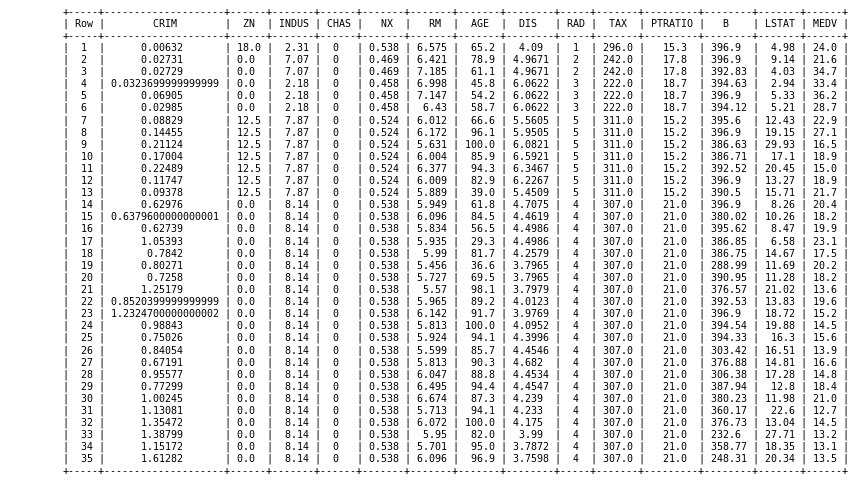

In [304]:
def headPlotter(dataframe, num_rows=5):
    # Example usage:
    # Replace 'df' with your DataFrame and specify the number of rows you want to display
    # headPlotter(df, num_rows=5)
    # Create a pretty table
    table = PrettyTable()

    # Add a "Row" column as the first column to represent row numbers
    table.field_names = ["Row"] + dataframe.columns.tolist()

    # Add rows to the table from the DataFrame with row numbers
    for row_num, row in enumerate(dataframe.head(num_rows).itertuples(index=False), start=1):
        table.add_row([row_num] + list(row))

    # Convert the table to a string
    table_str = str(table)

    # Create a plot to display the table
    plt.figure(figsize=(10, 3))
    plt.axis('off')  # Hide the axis
    plt.text(0.1, 0.1, table_str, fontsize=10, family='monospace')
    plt.show()

headPlotter(df, num_rows=35)

**Train & Test Splitting**

In [305]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NX       354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 41.5 KB


In [306]:
# Splitting the data into features (X) and target (y) for both train and test sets
x_train = train_df.iloc[:, :-1]  # select all columns except the last one as features
y_train = train_df.iloc[:, -1]   # select the last column as target

x_test = test_df.iloc[:, :-1]    # select all columns except the last one as features
y_test = test_df.iloc[:, -1]     # select the last column as target

# Print the shapes of the train and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (354, 13)
Shape of y_train: (354,)
Shape of x_test: (152, 13)
Shape of y_test: (152,)


**standardization**

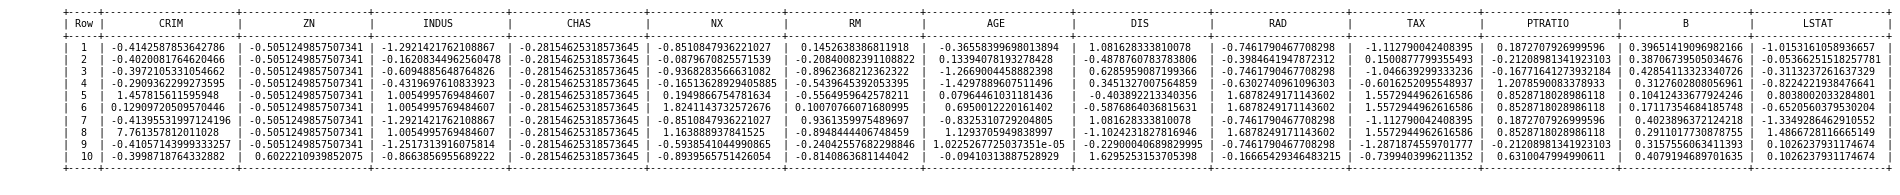

In [307]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# If x_train and x_test are DataFrames, you shouldn't use .values
# Fit the scaler to the x_train DataFrame and transform it
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)

# Now, the scaler has been fit to the training data.
# We use this fitted scaler to transform the x_test DataFrame
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

headPlotter(x_train_scaled, num_rows=10)

**Train using all features**

In [308]:
# Create a linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(x_train_scaled, y_train)

# The coefficients
# print('Coefficients: \n', lm.coef_)
# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.field_names = ['feature', 'Coefficient']

# Loop through the columns and coefficients and add them to the table
for col, coef in zip(x_train_scaled.columns, lm.coef_):
    table.add_row([col, coef])

reg_coef = lm.coef_
# Print the table
print(table)

+---------+---------------------+
| feature |     Coefficient     |
+---------+---------------------+
|   CRIM  | -1.1083460154177556 |
|    ZN   |  0.8084399775400799 |
|  INDUS  |  0.3431346557047915 |
|   CHAS  |  0.8138642573885833 |
|    NX   | -1.7980429490588934 |
|    RM   |  2.913857995549767  |
|   AGE   | -0.2989391755039232 |
|   DIS   |  -2.942511476980695 |
|   RAD   |  2.0941930300437606 |
|   TAX   | -1.4470673128119842 |
| PTRATIO | -2.0523223240868207 |
|    B    |  1.0237518746406002 |
|  LSTAT  | -3.8857900211493885 |
+---------+---------------------+


Test

In [309]:
# Make predictions using the training set
train_pred = lm.predict(x_train_scaled)

# Make predictions using the testing set
test_pred = lm.predict(x_test_scaled)

# The mean squared error and R² score for training set
print('\033[1mTraining set:\033[0m')
reg_train_mse =  metrics.mean_squared_error(y_train, train_pred)
reg_train_r2  =  metrics.r2_score(y_train, train_pred)
print('MSE: %.2f' %reg_train_mse)
print('R² Score: %.2f' %reg_train_r2 )

# The mean squared error and R² score for testing set
reg_test_mse =  metrics.mean_squared_error(y_test, test_pred)
reg_test_r2  =  metrics.r2_score(y_test, test_pred)
print('\033[1mTesting set:\033[0m')
print('MSE: %.2f' %reg_test_mse )
print('R² Score: %.2f' %reg_test_r2)

Training set:
MSE: 22.55
R² Score: 0.74
Testing set:
MSE: 21.52
R² Score: 0.71


**Forward Selection**

In [310]:
sfs = SFS(LinearRegression(),
           k_features=3,
           forward=True,
           floating=False,
           scoring='r2',
           cv=0)

sfs.fit(x_train_scaled, y_train)
selected_features = x_train_scaled.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')


**Train using forward selection**

In [311]:
x_train_forward = x_train_scaled[['RM', 'PTRATIO', 'LSTAT']]
x_test_forward  = x_test_scaled[['RM', 'PTRATIO', 'LSTAT']]

# Train the model using the training sets
lm.fit(x_train_forward, y_train)

# The coefficients
# print('Coefficients: \n', lm.coef_)
# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.field_names = ['feature', 'Coefficient']

# Loop through the columns and coefficients and add them to the table
for col, coef in zip(x_train_forward.columns, lm.coef_):
    table.add_row([col, coef])

forward_coef = lm.coef_
# Print the table
print(table)

+---------+---------------------+
| feature |     Coefficient     |
+---------+---------------------+
|    RM   |  3.2043150458018155 |
| PTRATIO |  -1.944643658302419 |
|  LSTAT  | -4.3192939213536965 |
+---------+---------------------+


In [312]:
# Make predictions using the training set
train_pred = lm.predict(x_train_forward)

# Make predictions using the testing set
test_pred = lm.predict(x_test_forward)

# The mean squared error and R² score for training set
print('\033[1mTraining set:\033[0m')
forward_train_mse =  metrics.mean_squared_error(y_train, train_pred)
forward_train_r2  =  metrics.r2_score(y_train, train_pred)
print('MSE: %.2f' % forward_train_mse)
print('R² Score: %.2f' % forward_train_r2)

# The mean squared error and R² score for testing set
print('\033[1mTesting set:\033[0m')
forward_test_mse =  metrics.mean_squared_error(y_test, test_pred)
forward_test_r2  =  metrics.r2_score(y_test, test_pred)
print('MSE: %.2f' % forward_test_mse)
print('R² Score: %.2f' % forward_test_r2)

Training set:
MSE: 27.69
R² Score: 0.69
Testing set:
MSE: 26.01
R² Score: 0.65


**Normal Regression VS Forward selected Regression**

In [313]:
from prettytable import PrettyTable

myTable = PrettyTable([" ", "RM Coef", "PTRATIO Coef", "LSTAT Coef", "MSE Train", "R² Train", "MSE Test", "R² Test"])

myTable.add_row(["Normal Regression",f'{reg_coef[5]:.3f}' , f'{reg_coef[10]:.3f}', f'{reg_coef[-1]:.3f}', f'{reg_train_mse:.2f}', f'{reg_train_r2:.2f}', f'{reg_test_mse:.2f}', f'{reg_test_r2:.2f}'])
myTable.add_row(["Forward selected Regression", f'{forward_coef[0]:.3f}', f'{forward_coef[1]:.3f}', f'{forward_coef[2]:.3f}', f'{forward_train_mse:.2f}', f'{forward_train_r2:.2f}', f'{forward_test_mse:.2f}', f'{forward_test_r2:.2f}'])

print(myTable)

## should change

+-----------------------------+---------+--------------+------------+-----------+----------+----------+---------+
|                             | RM Coef | PTRATIO Coef | LSTAT Coef | MSE Train | R² Train | MSE Test | R² Test |
+-----------------------------+---------+--------------+------------+-----------+----------+----------+---------+
|      Normal Regression      |  2.914  |    -2.052    |   -3.886   |   22.55   |   0.74   |  21.52   |   0.71  |
| Forward selected Regression |  3.204  |    -1.945    |   -4.319   |   27.69   |   0.69   |  26.01   |   0.65  |
+-----------------------------+---------+--------------+------------+-----------+----------+----------+---------+


Normal Regression: This is a regular linear regression model where all predictors are used simultaneously to fit to the target. Here, after the fitting process, ‘RM’ has a coefficient of 2.914 meaning that for each additional unit of RM, the target variable increases by 2.914, assuming all other variables are held constant. Same interpretation for PTRATIO and LSTAT coefficients but these are -2.052 and -3.886 respectively, which indicates a negative relationship with the target variable.

Forward selected Regression: This refers to a regression model where predictors are added one at a time starting with the predictor with the strongest correlation to the target, and then adding one at a time that provides the most significant improvement to the model. The coefficients have a similar interpretation to those in normal regression. However, the difference here is the model selection process and possibly which variables ended in the final model.

In terms of performance, Normal Regression outperforms Forward selected Regression in this case which is evidenced by -

a. MSE (Mean Squared Error): Lower for both train and test sets in Normal Regression. Lower MSE indicates better model performance as there’s less error between the predicted and actual values.

b. R²: Higher for both train and test sets in Normal Regression. Higher R² signifies that a higher proportion of variance in the target variable can be explained by the predictors, which is better.

Remember, the reason why Normal Regression is performing better might be due to it using the combined power of all predictors simultaneously, while Forward selection might have overlooked some valuable multi-feature correlation because it includes predictors incrementally.

**Principal Components**

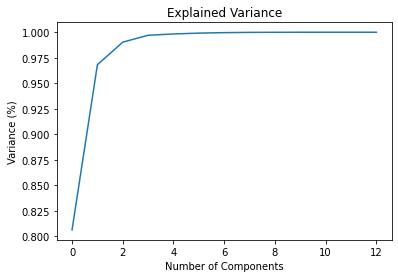

In [314]:
# Apply PCA and fit the features selected
pca = PCA().fit(x_train)

# Draw a graph to show the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

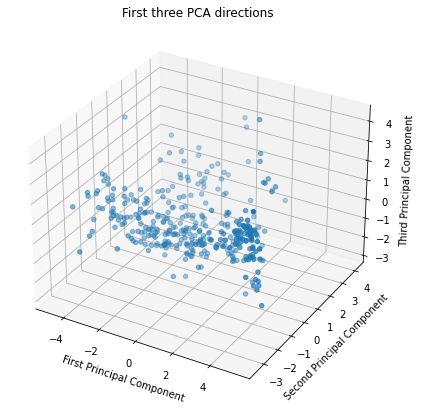

In [315]:
from mpl_toolkits.mplot3d import Axes3D

# Re-apply PCA to the data while selecting for three principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_train_scaled)

# Visualize the results on the first three PCA dimensions
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_result[:,0], ys=pca_result[:,1], zs=pca_result[:,2], depthshade=True)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('First three PCA directions')
plt.show()

**Regression on Principal Components**

In [316]:
from sklearn.linear_model import LinearRegression

# Initialize our regression model
reg = LinearRegression()

# Fit the model to the PCA components of your data
reg.fit(pca_result, y_train)

# Get the coefficients
pca_coef = reg.coef_

# Get the y-intercept
intercept = reg.intercept_

print("The coefficients are ", pca_coef)
print("The y-intercept is ", intercept)

The coefficients are  [-2.29164273  2.9553752   3.26825157]
The y-intercept is  23.01581920903955


**Test for Regression on Principal Components**

In [317]:
# Predict the values using the PCA transformed features 
train_pred = reg.predict(pca_result)


# Fit the model to the PCA components of your testing data
pca_test = pca.transform(x_test_scaled)
test_pred = reg.predict(pca_test)

# The mean squared error and R² score for training set
print('\033[1mTraining set:\033[0m')
pca_train_mse =  metrics.mean_squared_error(y_train, train_pred)
pca_train_r2  =  metrics.r2_score(y_train, train_pred)
print('MSE: %.2f' % pca_train_mse)
print('R² Score: %.2f' % pca_train_r2)

# The mean squared error and R² score for testing set
print('\033[1mTesting set:\033[0m')
pca_test_mse =  metrics.mean_squared_error(y_test, test_pred)
pca_test_r2  =  metrics.r2_score(y_test, test_pred)
print('MSE: %.2f' % pca_test_mse)
print('R² Score: %.2f' % pca_test_r2)

Training set:
MSE: 30.08
R² Score: 0.66
Testing set:
MSE: 29.86
R² Score: 0.60


**Normal Regression VS Forward selected Regression VS Principal Components Regression**

In [318]:
from prettytable import PrettyTable

myTable = PrettyTable([" ", "MSE Train", "R² Train", "MSE Test", "R² Test"])

myTable.add_row(["Normal Regression", f'{reg_train_mse:.2f}', f'{reg_train_r2:.2f}', f'{reg_test_mse:.2f}', f'{reg_test_r2:.2f}'])
myTable.add_row(["Forward selected Regression", f'{forward_train_mse:.2f}', f'{forward_train_r2:.2f}', f'{forward_test_mse:.2f}', f'{forward_test_r2:.2f}'])
myTable.add_row(["Principal Components Regression",f'{pca_train_mse:.2f}',f'{pca_train_r2:.2f}',f'{pca_test_mse:.2f}', f'{pca_test_r2:.2f}'])

print(myTable)

+---------------------------------+-----------+----------+----------+---------+
|                                 | MSE Train | R² Train | MSE Test | R² Test |
+---------------------------------+-----------+----------+----------+---------+
|        Normal Regression        |   22.55   |   0.74   |  21.52   |   0.71  |
|   Forward selected Regression   |   27.69   |   0.69   |  26.01   |   0.65  |
| Principal Components Regression |   30.08   |   0.66   |  29.86   |   0.60  |
+---------------------------------+-----------+----------+----------+---------+


# Linear and PCA Regression Coefficient Comparison
**Normal linear regression coefficients** and **PCA-based linear regression coefficients** result from two different modeling strategies and they carry different interpretations.

## Normal Linear Regression Coefficients:
In a typical linear regression, the coefficients represent the change in the response variable for a one-unit change in the predictor, assuming that the effects of all other predictors are held constant. For instance, if 'Income' is a variable and its coefficient is 1000, this means that for every unit increase in Income, the outcome variable is expected to increase by 1000 units, given that all other variables are held constant.

## PCA-Based Linear Regression Coefficients:
When you perform a Principal Component Analysis (PCA) prior to linear regression, you're transforming the predictors into a set of orthogonal (uncorrelated) variables, which are linear combinations of the original variables. The regression coefficients associated with these principal components depict the change in the response variable for a unit change in the principal component score, not the original predictors. Given that principal components are linear combinations of original predictors, it's difficult to provide an interpretation similar to traditional linear regression coefficients.

In essence, PCA regression coefficients are related to the derived components, not the original features. Therefore, they can be challenging to interpret in the context of your original problem, while normal regression coefficients provide a more immediate understanding of the relationship between predictors and the response.

>To summarize: We should not instantly compare PCA-based regression coefficients with normal or forward selected regression coefficients due to their inherent differences.

# Normal Regression vs Principal Component Regression
Normal Regression appears to perform the best according to both the Mean Squared Error (MSE) and R² measurements, both for the train and test sets. The reasons for this could be:

1. Normal Regression uses *all available predictors* concurrently to fit the model, allowing it to capitalize on all available information and potential interplay between different predictors.
2. The predictors in the dataset may not have severe multicollinearity. Normal regression can have issues when predictors are highly correlated (multicollinearity), but if that's not the case here, the model can work quite well.
3. Normal Regression models can be *less prone to overfitting* than forward-selection methods, which can improve the generalization to unseen data (test set).

On the other hand, Principal Components Regression (PCR) is showing the least performance among the three. PCR usually works well when predictors are highly correlated (i.e., multicollinearity issue). Likely reasons for the lower performance are:

1. There may be relatively little multicollinearity in your original predictors, so Principal Components (or dimensional reduction) is not necessary.
2. During PCA, components associated with the smallest variance are discarded under the assumption these components contain noise rather than signal. But sometimes, these components may still contain useful information, which is lost during the process, leading to underfitting ch regression techniques.on techniques.ence**

ponse.ponse.

**Ridge Regression alpha selection part**

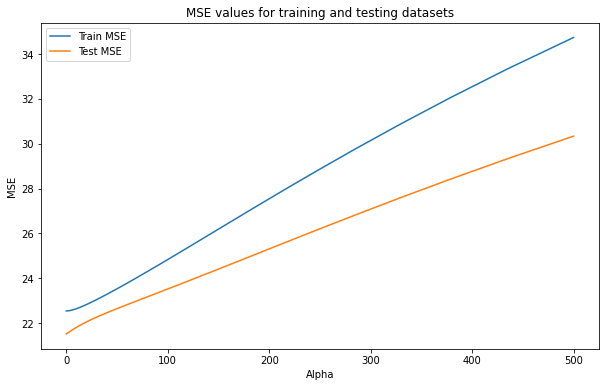

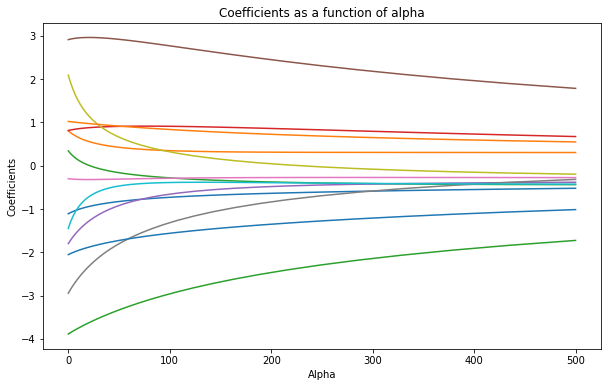

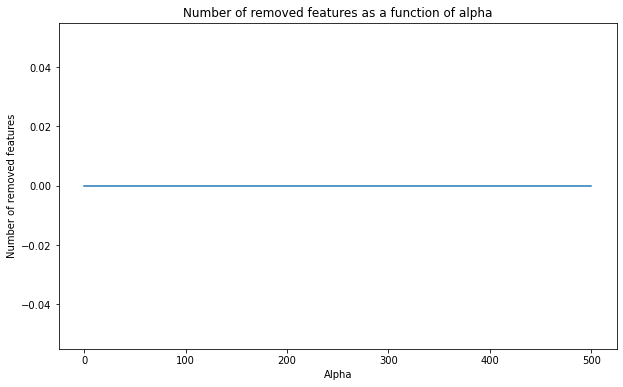

In [319]:

# Set the alpha values
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Initialize lists to store results
mse_train = []
mse_test = []
coefficients = []
removed_features = []

# Perform Ridge Regression for each alpha value
for alpha in alphas:
    # Create a Ridge regression object
    ridge = Ridge(alpha=alpha)
    
    # Train the model
    ridge.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = ridge.predict(x_train_scaled)
    y_test_pred = ridge.predict(x_test_scaled)
    
    # Calculate MSE for training and testing data
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    # Append coefficients and number of removed features
    coefficients.append(ridge.coef_)
    removed_features.append(np.sum(ridge.coef_ == 0))

# Plot MSE values as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE values for training and testing datasets')
plt.legend()
plt.show()

# Plot Coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients as a function of alpha')
plt.show()

# Plot Number of removed features as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, removed_features)
plt.xlabel('Alpha')
plt.ylabel('Number of removed features')
plt.title('Number of removed features as a function of alpha')
plt.show()

**Use Cross validation to select alpha**

In [320]:
# Import the RidgeCV function
from sklearn.linear_model import RidgeCV

# Create a RidgeCV object
ridge_cv = RidgeCV(cv=5)  # You can specify the number of folds for cross-validation using the cv parameter

# Train the model and perform cross-validation
ridge_cv.fit(x_train_scaled, y_train)

# Extract the best alpha value
best_alpha = ridge_cv.alpha_

# Print the best alpha value
print("Best Alpha:", best_alpha)

# Make predictions
y_train_pred = ridge_cv.predict(x_train_scaled)
y_test_pred = ridge_cv.predict(x_test_scaled)

# Calculate MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 10.0
Train MSE: 22.645075682504864
Test MSE: 21.811243071491575


**Ridge Regression Train**

In [321]:
# Perform Ridge Regression with the best alpha
ridge = Ridge(alpha=best_alpha)

# Train the model
ridge.fit(x_train_scaled, y_train)

# Make predictions
y_train_pred = ridge.predict(x_train_scaled)
y_test_pred = ridge.predict(x_test_scaled)

# Calculate R2 score for training and testing data
ridge_r2_train = ridge.score(x_train_scaled, y_train)
ridge_r2_test = ridge.score(x_test_scaled, y_test)

# Calculate MSE for training and testing data
ridge_mse_train = mean_squared_error(y_train, y_train_pred)
ridge_mse_test = mean_squared_error(y_test, y_test_pred)

# Get the coefficients
ridge_coef = ridge.coef_

# Print the results
print('\033[1mTraining set:\033[0m')
print("MSE for training data:", ridge_mse_train)
print("R2 score for training data:", ridge_r2_train)
print('\033[1mTesting set:\033[0m')
print("MSE for testing data:", ridge_mse_test)
print("R2 score for testing data:", ridge_r2_test)
print('\033[1mRidge Coefficients :\033[0m')
print("Coefficients:", ridge_coef)

Training set:
MSE for training data: 22.645075682504864
R2 score for training data: 0.7423666687004578
Testing set:
MSE for testing data: 21.811243071491575
R2 score for testing data: 0.7072830902371282
Ridge Coefficients :
Coefficients: [-1.00863113  0.65367126  0.13011532  0.85563487 -1.49397357  2.9537045
 -0.31502793 -2.59325927  1.49269132 -0.95371712 -1.95525142  0.99807142
 -3.74953233]


In [322]:
# Import the prettytable library
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add the column names
table.field_names = [''] + x_train.columns.tolist()

# Add the linear regression coefficients to the table with rounding
table.add_row(['Linear Regression'] + [round(coef, 3) for coef in reg_coef.tolist()])

# Add the ridge regression coefficients to the table with rounding
table.add_row(['Ridge Regression'] + [round(coef, 3) for coef in ridge_coef.tolist()])

# Print the table
print(table)

+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+
|                   |  CRIM  |   ZN  | INDUS |  CHAS |   NX   |   RM  |  AGE   |  DIS   |  RAD  |  TAX   | PTRATIO |   B   | LSTAT  |
+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+
| Linear Regression | -1.108 | 0.808 | 0.343 | 0.814 | -1.798 | 2.914 | -0.299 | -2.943 | 2.094 | -1.447 |  -2.052 | 1.024 | -3.886 |
|  Ridge Regression | -1.009 | 0.654 |  0.13 | 0.856 | -1.494 | 2.954 | -0.315 | -2.593 | 1.493 | -0.954 |  -1.955 | 0.998 | -3.75  |
+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+


**Lasso Regression alpha selection part**

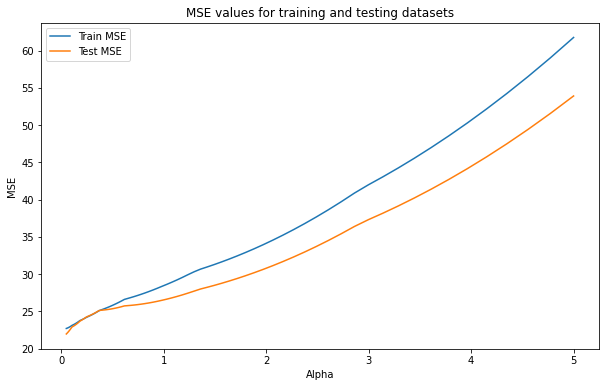

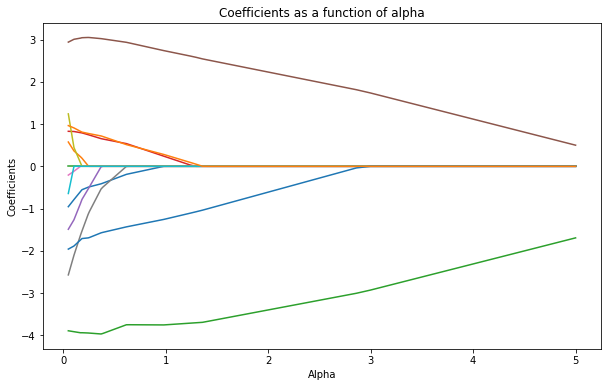

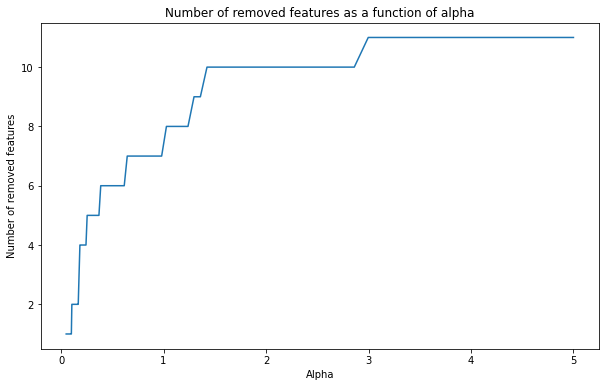

In [323]:
from sklearn.linear_model import Lasso

# Set the alpha values
alphas = 10 ** np.linspace(1, -1, 100) * 0.5

# Initialize lists to store results
mse_train = []
mse_test = []
coefficients = []
removed_features = []

# Perform lasso Regression for each alpha value
for alpha in alphas:
    # Create a lasso regression object
    lasso = Lasso(alpha=alpha)
    
    # Train the model
    lasso.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = lasso.predict(x_train_scaled)
    y_test_pred = lasso.predict(x_test_scaled)
    
    # Calculate MSE for training and testing data
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    # Append coefficients and number of removed features
    coefficients.append(lasso.coef_)
    removed_features.append(np.sum(lasso.coef_ == 0))

# Plot MSE values as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE values for training and testing datasets')
plt.legend()
plt.show()

# Plot Coefficients as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients as a function of alpha')
plt.show()

# Plot Number of removed features as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, removed_features)
plt.xlabel('Alpha')
plt.ylabel('Number of removed features')
plt.title('Number of removed features as a function of alpha')
plt.show()

## Ridge Regression and Lasso Regression: Differences in Coefficient Values

When comparing Ridge Regression and Lasso Regression, there is a fundamental difference in their treatment of coefficient values:

**Ridge Regression**: The penalty term in Ridge Regression (L2 regularization) is equal to the square of the magnitude of the coefficients. It is represented by the square of the L2 norm of the coefficients. The goal is to shrink the coefficients towards zero while still maintaining their non-zero values. The penalty term can be written as:

λ * Σ(β_j^2) for j = 1 to p

Where λ is the tuning parameter, and β_j are the coefficients. Due to the squared term, the Ridge penalty imposes a penalty on all coefficients but does not force any coefficient to be exactly zero.

**Lasso Regression**: In contrast, the penalty term in Lasso Regression (L1 regularization) is equal to the absolute value of the magnitude of the coefficients. It is represented by the L1 norm of the coefficients. The goal is to not only shrink the coefficients but also perform feature selection by forcing some coefficients to be exactly zero. The Lasso penalty term can be written as:

λ * Σβ_j for j = 1 to p

Where λ is the tuning parameter, and β_j are the coefficients. Because of the absolute value term, the Lasso penalty can directly result in some coefficients being exactly zero, effectively removing those features from the model.

The main difference between Ridge Regression and Lasso Regression lies in the shape of their constraint regions. The L2 regularization constraint region of Ridge Regression is spherical, while the L1 regularization constraint region of Lasso Regression is diamond-shaped with sharp corners. This geometric difference is what leads to the different treatment of coefficient values—Ridge Regression shrinks the coefficients towards zero but not exactly to zero, while Lasso Regression can shrink coefficients to exactly zero, effectively performing feature selection.

In summary, Ridge Regression and Lasso Regression differ in their ability to set coefficients to zero. Ridge Regression only shrinks coefficients towards zero, while Lasso Regression can force some coefficients to be exactly zero, allowing for feature selection.

**Use Cross validation to select alpha**

In [324]:
# Import the LassoCV function
from sklearn.linear_model import LassoCV

# Create a LassoCV object
lasso_cv = LassoCV(cv=5)  # You can specify the number of folds for cross-validation using the cv parameter

# Train the model and perform cross-validation
lasso_cv.fit(x_train_scaled, y_train)

# Extract the best alpha value
best_alpha = lasso_cv.alpha_

# Print the best alpha value
print("Best Alpha:", best_alpha)

# Make predictions
y_train_pred = lasso_cv.predict(x_train_scaled)
y_test_pred = lasso_cv.predict(x_test_scaled)

# Calculate MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 0.007004359982644433
Train MSE: 22.549046257256407
Test MSE: 21.550056765156633


**Lasso Regression Train**

In [325]:
# Perform Lasso Regression with the best alpha
lasso = Lasso(alpha=best_alpha)

# Train the model
lasso.fit(x_train_scaled, y_train)

# Make predictions
y_train_pred = lasso.predict(x_train_scaled)
y_test_pred = lasso.predict(x_test_scaled)

# Calculate R2 score for training and testing data
lasso_r2_train = lasso.score(x_train_scaled, y_train)
lasso_r2_test = lasso.score(x_test_scaled, y_test)

# Calculate MSE for training and testing data
lasso_mse_train = mean_squared_error(y_train, y_train_pred)
lasso_mse_test = mean_squared_error(y_test, y_test_pred)

# Get the coefficients
lasso_coef = lasso.coef_

# Print the results
print('\033[1mTraining set:\033[0m')
print("MSE for training data:", lasso_mse_train)
print("R2 score for training data:", lasso_r2_train)
print('\033[1mTesting set:\033[0m')
print("MSE for testing data:", lasso_mse_test)
print("R2 score for testing data:", lasso_r2_test)
print('\033[1mlasso Coefficients :\033[0m')
print("Coefficients:", lasso_coef)

Training set:
MSE for training data: 22.549046257256407
R2 score for training data: 0.7434591967660034
Testing set:
MSE for testing data: 21.550056765156633
R2 score for testing data: 0.7107883305488403
lasso Coefficients :
Coefficients: [-1.08686652  0.77336344  0.27617215  0.81708934 -1.74875551  2.91588673
 -0.28574908 -2.89316275  1.96629664 -1.32194405 -2.03800191  1.01477711
 -3.88682201]


In [326]:
# Import the prettytable library
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add the column names
table.field_names = [''] + x_train.columns.tolist()

# Add the linear regression coefficients to the table with rounding
table.add_row(['Linear Regression'] + [round(coef, 3) for coef in reg_coef.tolist()])

# Add the ridge regression coefficients to the table with rounding
table.add_row(['Ridge Regression'] + [round(coef, 3) for coef in ridge_coef.tolist()])

# Add the lasso regression coefficients to the table with rounding
table.add_row(['Lasso Regression'] + [round(coef, 3) for coef in lasso_coef.tolist()])

# Print the table
print(table)

+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+
|                   |  CRIM  |   ZN  | INDUS |  CHAS |   NX   |   RM  |  AGE   |  DIS   |  RAD  |  TAX   | PTRATIO |   B   | LSTAT  |
+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+
| Linear Regression | -1.108 | 0.808 | 0.343 | 0.814 | -1.798 | 2.914 | -0.299 | -2.943 | 2.094 | -1.447 |  -2.052 | 1.024 | -3.886 |
|  Ridge Regression | -1.009 | 0.654 |  0.13 | 0.856 | -1.494 | 2.954 | -0.315 | -2.593 | 1.493 | -0.954 |  -1.955 | 0.998 | -3.75  |
|  Lasso Regression | -1.087 | 0.773 | 0.276 | 0.817 | -1.749 | 2.916 | -0.286 | -2.893 | 1.966 | -1.322 |  -2.038 | 1.015 | -3.887 |
+-------------------+--------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-------+--------+


**Statistics**

In [327]:
from prettytable import PrettyTable

myTable = PrettyTable([" ", "MSE Train", "R² Train", "MSE Test", "R² Test"])

myTable.add_row(["Linear Regression", f'{reg_train_mse:.2f}', f'{reg_train_r2:.2f}', f'{reg_test_mse:.2f}', f'{reg_test_r2:.2f}'])
myTable.add_row(["Ridge Regression", f'{ridge_mse_train:.2f}', f'{ridge_r2_train:.2f}', f'{ridge_mse_test:.2f}', f'{ridge_r2_test:.2f}'])
myTable.add_row(["Lasso Regression",f'{lasso_mse_train:.2f}',f'{lasso_r2_train:.2f}',f'{lasso_mse_test:.2f}', f'{lasso_r2_test:.2f}'])

print(myTable)


+-------------------+-----------+----------+----------+---------+
|                   | MSE Train | R² Train | MSE Test | R² Test |
+-------------------+-----------+----------+----------+---------+
| Linear Regression |   22.55   |   0.74   |  21.52   |   0.71  |
|  Ridge Regression |   22.65   |   0.74   |  21.81   |   0.71  |
|  Lasso Regression |   22.55   |   0.74   |  21.55   |   0.71  |
+-------------------+-----------+----------+----------+---------+


All three regression methods have similar performance with slight variations in the MSE (Mean Squared Error) and R² (R-squared) values. However, based on the provided numbers, it is difficult to conclude which method is better for what scenarios.

To assess which method is better suited for specific scenarios, we need additional information such as the nature of the data, the number of features, and the goal of the regression analysis. Additionally, it is important to consider factors like interpretability, computational efficiency, and assumptions of each method.

If you provide more context regarding your data and the purpose of regression analysis, I can provide further guidance on which method might be more suita


When it comes to using Linear, Ridge, or Lasso Regression, the choice between them typically depends on the particular characteristics of the dataset you’re working with:

Linear Regression is generally used when:

You have a small number of observations.
The data is not heavily regularized.
You assume that the data is normally distributed.
There isn’t a concern about multicollinearity in the data.
It is considered the most basic and is used for predictive modeling. It’s best suited when we believe the predictors are linearly related to the outcome.

Ridge Regression is better when:

There is a high multicollinearity between independent variables.
You have a large number of predictor variables.
The model needs regularization to avoid overfitting (Ridge adds “squared magnitude” of coefficient as penalty term to the loss function).
Ridge regression is useful when there are more predictors than observations or when there is multicollinearity among the predictor variables, which means predictors are highly correlated.

Lasso Regression is most useful:

When you want to perform feature selection along with regularization.
When there are less important features to shrink their coefficients to zero, effectively performing variable selection.
To improve the prediction accuracy and interpretability of the regression model.
Lasso adds “absolute value of magnitude” of coefficient as penalty term to the loss function, which can completely eliminate the weight of less important features.

Given the metrics (MSE and R²) are quite close in your dataset, with a small preference towards Linear Regression in terms of lower MSE on the test set, the deciding factor could come down to the dimensionality of the data and the level of multicollinearity. If there’s a high level of multicollinearity or a large number of predictors, Ridge or Lasso might be more appropriate. If the goal is feature selection due to a high number of features, Lasso could be the best choice.ble.

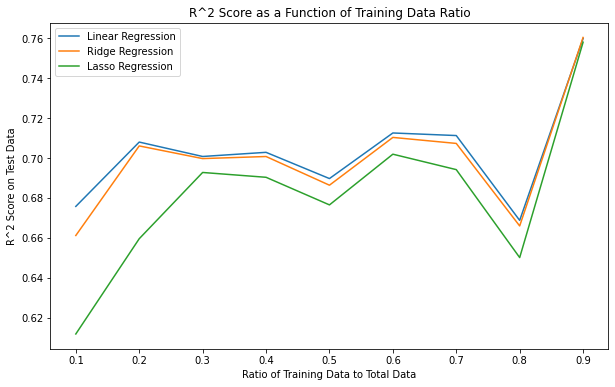

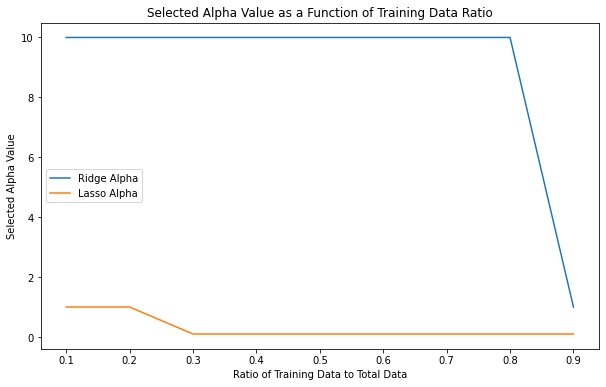

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Create arrays to store results
ratios = np.linspace(0.1, 0.9, 9)  # Adjust as needed
linear_r2_values = []
ridge_r2_values = []
lasso_r2_values = []
ridge_alpha_values = []
lasso_alpha_values = []

# Loop over ratios
for ratio in ratios:
    # Split data based on current ratio
    x_train, x_test, y_train, y_test = train_test_split(
        df.iloc[:, :-1], df.iloc[:, -1], test_size=1 - ratio, random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(x_train_scaled, y_train)
    linear_r2 = r2_score(y_test, linear_model.predict(x_test_scaled))
    linear_r2_values.append(linear_r2)

    # Ridge Regression
    ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])  # Use appropriate alpha values
    ridge_model.fit(x_train_scaled, y_train)
    ridge_r2 = r2_score(y_test, ridge_model.predict(x_test_scaled))
    ridge_alpha_values.append(ridge_model.alpha_)
    ridge_r2_values.append(ridge_r2)

    # Lasso Regression
    lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0])  # Use appropriate alpha values
    lasso_model.fit(x_train_scaled, y_train)
    lasso_r2 = r2_score(y_test, lasso_model.predict(x_test_scaled))
    lasso_alpha_values.append(lasso_model.alpha_)
    lasso_r2_values.append(lasso_r2)

# Plotting R^2 values
plt.figure(figsize=(10, 6))
plt.plot(ratios, linear_r2_values, label='Linear Regression')
plt.plot(ratios, ridge_r2_values, label='Ridge Regression')
plt.plot(ratios, lasso_r2_values, label='Lasso Regression')
plt.xlabel('Ratio of Training Data to Total Data')
plt.ylabel('R^2 Score on Test Data')
plt.legend()
plt.title('R^2 Score as a Function of Training Data Ratio')
plt.show()

# Plotting selected alpha values
plt.figure(figsize=(10, 6))
plt.plot(ratios, ridge_alpha_values, label='Ridge Alpha')
plt.plot(ratios, lasso_alpha_values, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data to Total Data')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.title('Selected Alpha Value as a Function of Training Data Ratio')
plt.show()


**R^2 Score:**

- *Increasing Training Data Ratio:* As the ratio of training data to total data increases, the R^2 score on the test data is likely to increase. More training data allows the models to better capture the underlying patterns in the data, leading to improved generalization to the test set.

- *Decreasing Training Data Ratio:* Conversely, as the ratio decreases, the R^2 score on the test data may decrease. With less training data, the models may struggle to generalize well to unseen examples, resulting in a lower R^2 score.

**Mean Squared Error (MSE):**

- *Increasing Training Data Ratio:* An increase in the training data ratio typically corresponds to a decrease in MSE. With more training data, models tend to perform better on the test set, resulting in lower prediction errors and, consequently, lower MSE.

- *Decreasing Training Data Ratio:* Conversely, a decrease in the training data ratio may lead to an increase in MSE. With less training data, the models may exhibit higher prediction errors on the test set, resulting in a higher MSE.

In summary, the trend is generally that both R^2 scores and MSE improve as the ratio of training data to total data increases, and they may worsen as this ratio decreases. However, the specific behavior can be influenced by factors such as the complexity of the model, the characteristics of the dataset, and the presence of overfitting or underfitting.


**In all three methods, it is preferable that the ratio of training data to test data be close to 90 percent.**
